In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

final_train = train.copy()
final_test = test.copy()

In [3]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [4]:
train.columns

Index(['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

## About Q1 ~ Q26

In [5]:
Qs = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
     'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12',
     'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
     'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
     'Q25', 'Q26']

<AxesSubplot:>

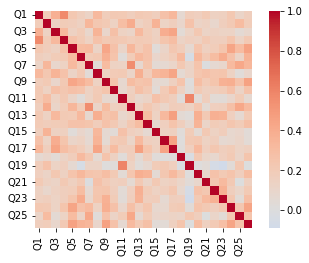

In [6]:
correlations = train[Qs].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [7]:
train['Qs_Mach'] = train[Qs].mean(axis = 1)
test['Qs_Mach'] = test[Qs].mean(axis = 1)

<AxesSubplot:xlabel='Qs_Mach', ylabel='Count'>

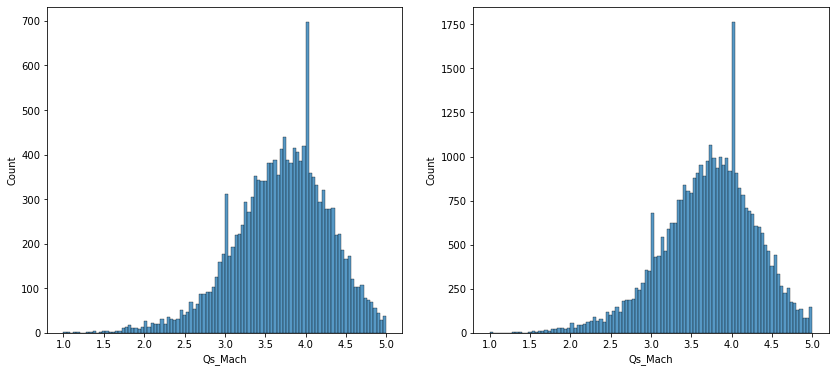

In [8]:
f,ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(train, x="Qs_Mach", bins=100, ax=ax[0])
sns.histplot(test, x="Qs_Mach", bins=100, ax=ax[1])

In [9]:
final_train['Qs_Mach'] = train['Qs_Mach']
final_test['Qs_Mach'] = test['Qs_Mach']

In [10]:
display(train.iloc[:, 1:10].describe())
display(train.iloc[:, 11:20].describe())
display(train.iloc[:, 21:27].describe())

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
count,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000
mean,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418
std,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,14941.000000,14933.000000,14960.000000,14964.000000,14955.000000,14967.000000,14963.000000,14937.000000,14947.000000
mean,3.123419,3.798835,3.701404,3.723603,3.021130,3.433621,3.941121,3.903461,3.385763
std,1.569761,1.233672,1.321331,1.160248,1.514791,1.399485,1.136492,1.322643,1.546368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000
50%,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


,Q21,Q22,Q23,Q24,Q25,Q26
count,14961.000000,14962.000000,14950.000000,14939.000000,14956.000000,14932.000000
mean,2.968384,2.412846,3.835452,4.296740,3.151444,4.161465
std,1.609673,1.375515,1.360530,0.919564,1.376888,1.030046
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,4.000000,2.000000,4.000000
50%,3.000000,2.000000,4.000000,5.000000,3.000000,4.000000
75%,5.000000,3.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
train_Qs = train.iloc[:, 1:27]

In [12]:
train_Qs['nerdiness'] = train['nerdiness']

In [13]:
for c in Qs:
    mean_df = train_Qs.groupby(c)['nerdiness'].agg('mean')
    final_train[c] = train[c].map(mean_df)
    final_test[c] = test[c].map(mean_df)

## TIPI1 ~ TIPI10

In [17]:
TIPIS = [x for x in train.columns if x.startswith('TIPI')]
for column in TIPIS:
    mean_df = train.groupby(column)['nerdiness'].agg('mean')
    display(mean_df)
    final_train[column] = train[column].map(mean_df)
    final_test[column] = test[column].map(mean_df)

TIPI1
1.0    0.647515
2.0    0.590264
3.0    0.509051
4.0    0.490276
5.0    0.524272
Name: nerdiness, dtype: float64

TIPI2
1.0    0.556116
2.0    0.532758
3.0    0.547437
4.0    0.572988
5.0    0.588448
Name: nerdiness, dtype: float64

TIPI3
1.0    0.526846
2.0    0.563307
3.0    0.532462
4.0    0.575373
5.0    0.584342
Name: nerdiness, dtype: float64

TIPI4
1.0    0.536932
2.0    0.537153
3.0    0.532669
4.0    0.588039
5.0    0.590032
Name: nerdiness, dtype: float64

TIPI5
1.0    0.578125
2.0    0.588367
3.0    0.531244
4.0    0.549323
5.0    0.585542
Name: nerdiness, dtype: float64

TIPI6
1.0    0.441379
2.0    0.529609
3.0    0.516907
4.0    0.571829
5.0    0.611198
Name: nerdiness, dtype: float64

TIPI7
1.0    0.591652
2.0    0.557346
3.0    0.527097
4.0    0.560243
5.0    0.601787
Name: nerdiness, dtype: float64

TIPI8
1.0    0.547501
2.0    0.550339
3.0    0.536615
4.0    0.580372
5.0    0.604298
Name: nerdiness, dtype: float64

TIPI9
1.0    0.608624
2.0    0.565574
3.0    0.545113
4.0    0.550051
5.0    0.558732
Name: nerdiness, dtype: float64

TIPI10
1.0    0.618666
2.0    0.573662
3.0    0.489265
4.0    0.457143
5.0    0.596107
Name: nerdiness, dtype: float64

## About VCL1 ~ VCL16

## About 

In [21]:
train.columns

Index(['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness', 'Qs_Mach'],
      dtype='object')

<AxesSubplot:xlabel='education', ylabel='count'>

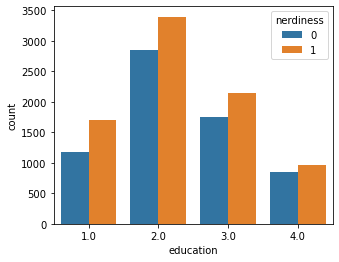

In [24]:
plt.figure(figsize = (5,4))
sns.countplot(data = train, x = 'education', hue = train['nerdiness'])

<AxesSubplot:xlabel='urban', ylabel='count'>

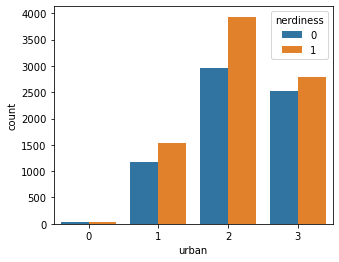

In [25]:
plt.figure(figsize = (5,4))
sns.countplot(data = train, x = 'urban', hue = train['nerdiness'])

<AxesSubplot:xlabel='gender', ylabel='count'>

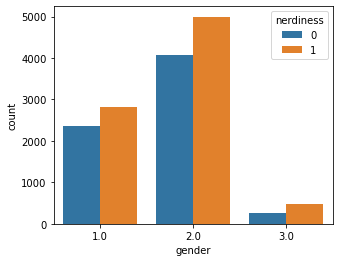

In [26]:
plt.figure(figsize = (5,4))
sns.countplot(data = train, x = 'gender', hue = train['nerdiness'])